<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/Neural_Network_Back_Propagation(forestfires).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [1]:
# Create your first MLP in Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
import numpy

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [5]:
import pandas as pd
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

dataset = pd.read_csv("forestfires.csv")
dataset


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset["month"] = label_encoder.fit_transform(dataset["month"])
dataset["day"] = label_encoder.fit_transform(dataset["day"])
dataset["size_category"] = label_encoder.fit_transform(dataset["size_category"])

In [7]:
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [9]:
#dataset = numpy.loadtxt("C:\\Users\\UNME\\Downloads\\DS Course\\Neural Networks\\pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset.iloc[:,:11]
Y = dataset.iloc[:,-1]

In [10]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [11]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [17]:
# create model
model = Sequential()
model.add(layers.Dense(50, input_dim=11,  activation='relu'))
model.add(layers.Dense(11,  activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

![image.png](attachment:image.png)

In [18]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [20]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0909 - acc: 0.9624 - val_loss: 0.1817 - val_acc: 0.9357
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0727 - acc: 0.9682 - val_loss: 0.1013 - val_acc: 0.9474
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0475 - acc: 0.9855 - val_loss: 0.0991 - val_acc: 0.9474
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0459 - acc: 0.9827 - val_loss: 0.1180 - val_acc: 0.9474
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1991 - acc: 0.9335 - val_loss: 0.1137 - val_acc: 0.9357
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0676 - acc: 0.9711 - val_loss: 0.2170 - val_acc: 0.9240
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0507 - acc: 0.9769 - val_loss: 0.2809 - val_acc: 0.9006
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0525 - a

In [21]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0811 - acc: 0.9710
acc: 97.10%


In [22]:
# Visualize training history

# list all data in history
history.history.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

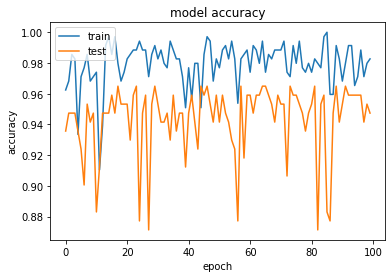

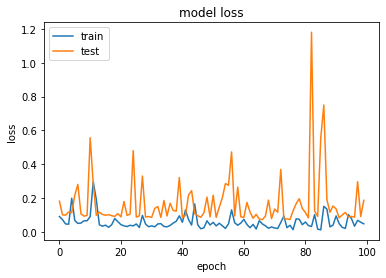

In [23]:
# summarize history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
